In [92]:

import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime
import numpy as np


from sklearn.preprocessing import StandardScaler


from keras.layers import Input, Dense, Dropout, LSTM, TimeDistributed, RepeatVector
from keras.models import Model


import plotly.express as px
%matplotlib inline
import cufflinks as cf
# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [93]:
"""


df=pd.read_csv("hourly_features_FT1_121.csv")
ft_name="FT1_121"
df=df.set_index('ts')
name_list=['_value','resid','trend','seasonal','dayofweek'] 
df=df[name_list]
df=df.dropna()
df_train=df.loc['2017-01-01':'2018-01-01']
df_test=df.loc['2016-01-01':'2016-07-01']
df

# FLFT1 19.12.2019 Sudden
df=pd.read_csv("hourly_features_FLFT1.csv")
ft_name="FLFT1"
df=df.set_index('ts')
name_list=['_value','resid','trend','seasonal','dayofweek'] 
df=df[name_list]
df=df.dropna()
df_train=df.loc['2017-01-01':'2018-01-01']
df_test=df.loc['2019-11-01':'2020-01-30']
df



"""
#SENT_SORGJERDET_FT01_F_CV 17.10.2020 Gradually
df=pd.read_csv("hourly_features_SENT_SORGJERDET_FT01_F_CV.csv")
ft_name="FT01"
df=df.set_index('ts')
name_list=['_value','resid','trend','seasonal','dayofweek'] 
df=df[name_list]
df=df.dropna()
df_train=df.loc['2019-12-01':'2020-05-01']
df_test=df.loc['2020-09-01':'2020-11-30']
df






,_value,resid,trend,seasonal,dayofweek
ts,,,,,
2016-06-22 15:00:00+00:00,33.229036,-24.075275,57.592792,-0.288480,2
2016-06-22 16:00:00+00:00,18.555344,-26.599413,45.113817,0.040940,2
2016-06-22 17:00:00+00:00,16.202569,-15.314328,31.234170,0.282727,2
2016-06-22 18:00:00+00:00,13.130780,-18.616933,31.312701,0.435013,2
2016-06-22 19:00:00+00:00,14.626120,-17.392349,31.438804,0.579666,2
...,...,...,...,...,...
2020-12-31 07:00:00+00:00,3.168760,-1.801868,4.411474,0.559155,3
2020-12-31 08:00:00+00:00,5.468488,0.507288,4.401212,0.559989,3
2020-12-31 09:00:00+00:00,3.123251,-2.061470,4.401209,0.783513,3


In [94]:
#df.iplot()

In [95]:

#df_train.iplot()

In [96]:


#df_test.iplot()

In [97]:
scaler = StandardScaler()
scaler = scaler.fit(df_train)
arr_train = scaler.transform(df_train)
arr_test = scaler.transform(df_test)

df_train_scaled=pd.DataFrame(arr_train)
df_test_scaled=pd.DataFrame(arr_test)

In [98]:
df_train_scaled.columns=name_list
df_test_scaled.columns=name_list


df_test_scaled=df_test_scaled.set_index(df_test.index)
df_train_scaled=df_train_scaled.set_index(df_train.index)

In [99]:
#Data for Autoencoder
df_train_sc_ae=df_train_scaled.copy()
df_test_sc_ae=df_test_scaled.copy()

In [100]:
def create_dataset(X, time_steps=30):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)


TIME_STEPS = 24

X_train = create_dataset(
df_train_sc_ae,
TIME_STEPS)

X_test = create_dataset(
df_test_sc_ae,
TIME_STEPS)
X=X_train

In [101]:
"""

    inputs = Input(shape=(X.shape[1],X.shape[2]))
    L1=LSTM(LSTM_size,activation='relu',return_sequences=True)(inputs)
    L2=LSTM(int(LSTM_size/2),activation='relu',return_sequences=False)(L1)
    L3=RepeatVector(X.shape[1])(L2)
    L4=LSTM(int(LSTM_size/2),activation='relu',return_sequences=True)(L3)
    L5=LSTM(LSTM_size,activation='relu',return_sequences=True)(L4)
    output=TimeDistributed(Dense(X.shape[2]))(L5)
    model=Model(inputs=inputs,outputs=output)
    model.compile(optimizer=optimz,loss='mae')
    model.summary()

    """

"\n\n    inputs = Input(shape=(X.shape[1],X.shape[2]))\n    L1=LSTM(LSTM_size,activation='relu',return_sequences=True)(inputs)\n    L2=LSTM(int(LSTM_size/2),activation='relu',return_sequences=False)(L1)\n    L3=RepeatVector(X.shape[1])(L2)\n    L4=LSTM(int(LSTM_size/2),activation='relu',return_sequences=True)(L3)\n    L5=LSTM(LSTM_size,activation='relu',return_sequences=True)(L4)\n    output=TimeDistributed(Dense(X.shape[2]))(L5)\n    model=Model(inputs=inputs,outputs=output)\n    model.compile(optimizer=optimz,loss='mae')\n    model.summary()\n\n    "

In [102]:
def autoencoder(LSTM_size=16,batchsize=20, optimz="adam"):
    inputs = Input(shape=(X.shape[1],X.shape[2]))
    L1=LSTM(LSTM_size,activation='relu',return_sequences=False)(inputs)
    L2=RepeatVector(X.shape[1])(L1)
    L3=LSTM(LSTM_size,activation='relu',return_sequences=True)(L2)
    output=TimeDistributed(Dense(X.shape[2]))(L3)
    model=Model(inputs=inputs,outputs=output)
    model.compile(optimizer=optimz,loss='mae')
    model.summary()

    history = model.fit(
        X_train, X_train,
        epochs=3,
        batch_size=batchsize,
        validation_split=0.2,
        shuffle=True
    ).history

    X_train_pred = model.predict(X_train)
    train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)
    df_train_loss = pd.DataFrame(train_mae_loss)

    train_mae_loss_one_dim=[]
    for l in train_mae_loss:
        train_mae_loss_one_dim.append(sum(l))

    #THRESHOLD = np.mean(train_mae_loss_one_dim)
    #THRESHOLD = max(train_mae_loss_one_dim)
    THRESHOLD = np.mean(train_mae_loss_one_dim) + 3*np.std(train_mae_loss_one_dim)
    print(max(train_mae_loss_one_dim))
    print(np.mean(train_mae_loss_one_dim))
    print(np.std(train_mae_loss_one_dim))

    X_test_pred = model.predict(X_test)

    test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

    test_mae_loss_one_dim=[]
    for l in test_mae_loss:
        test_mae_loss_one_dim.append(sum(l))

    test_score_df = pd.DataFrame(index=df_test_sc_ae[TIME_STEPS:].index)
    test_score_df['loss'] = test_mae_loss_one_dim
    test_score_df['threshold'] = THRESHOLD
    test_score_df['anomaly'] = (test_score_df.loss > test_score_df.threshold).astype(int)
    test_score_df['_value'] = df_test_sc_ae["_value"]
    #test_score_df['_value'].plot(figsize=(13,8))
    #test_score_df['anomaly'].plot(figsize=(13,8))
    return history, test_score_df

In [103]:
"""
#To try different hyperparameters
result=pd.DataFrame()
list_LSTM_size=[8,16,32]
list_batchsize=[20,50,80]
list_optimz=["adam","adamax"]

for LSTM_size in list_LSTM_size:
    for batchsize in list_batchsize:
        for optimz in list_optimz:
            param_str=str(LSTM_size) +"-"+ str(batchsize)+"-"+str(optimz)
            print("Running: "+ param_str)
            history=autoencoder(LSTM_size,batchsize, optimz)
            result["l"+param_str]=history["loss"]
            result["vl"+param_str]=history["val_loss"]
result
"""

'\n#To try different hyperparameters\nresult=pd.DataFrame()\nlist_LSTM_size=[8,16,32]\nlist_batchsize=[20,50,80]\nlist_optimz=["adam","adamax"]\n\nfor LSTM_size in list_LSTM_size:\n    for batchsize in list_batchsize:\n        for optimz in list_optimz:\n            param_str=str(LSTM_size) +"-"+ str(batchsize)+"-"+str(optimz)\n            print("Running: "+ param_str)\n            history=autoencoder(LSTM_size,batchsize, optimz)\n            result["l"+param_str]=history["loss"]\n            result["vl"+param_str]=history["val_loss"]\nresult\n'

In [104]:
#For å kjøre på vanlig vis
result,test_score_df=autoencoder()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 24, 5)]           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 16)                1408      
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 24, 16)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 24, 16)            2112      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 24, 5)             85        
Total params: 3,605
Trainable params: 3,605
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
145/145 [==============================] - 13s 44ms/step - loss: 0.6532 - val_loss: 0.7112
Epoch 2/3
145/145 [===

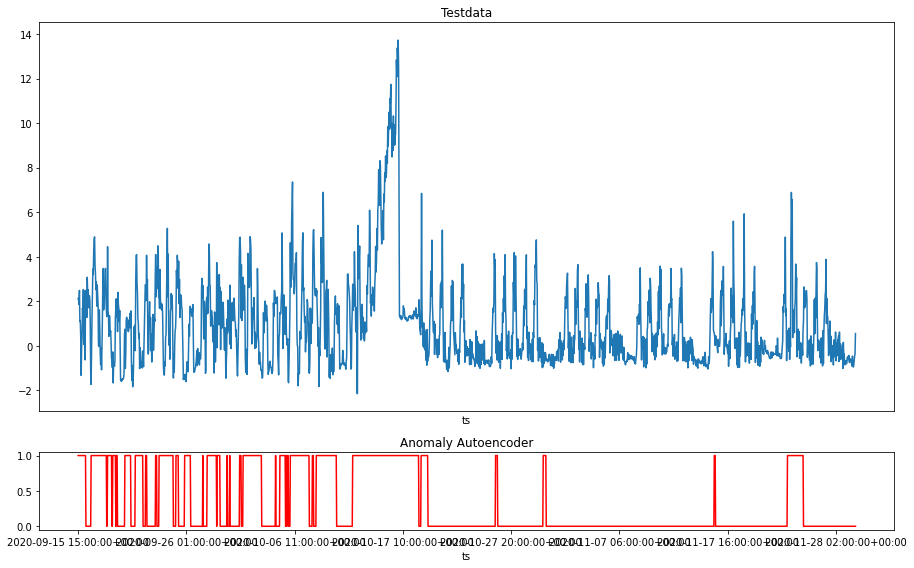

In [105]:


fig, (a1,a2) = plt.subplots(nrows=2, ncols=1,gridspec_kw={'height_ratios': [5,1]})

test_score_df["_value"].plot(ax=a1,figsize=(13,8))
a1.set_title('Testdata')
a1.get_xaxis().set_ticks([])

test_score_df["anomaly"].plot(color="red",ax=a2)
a2.set_title('Anomaly Autoencoder')


fig.tight_layout()

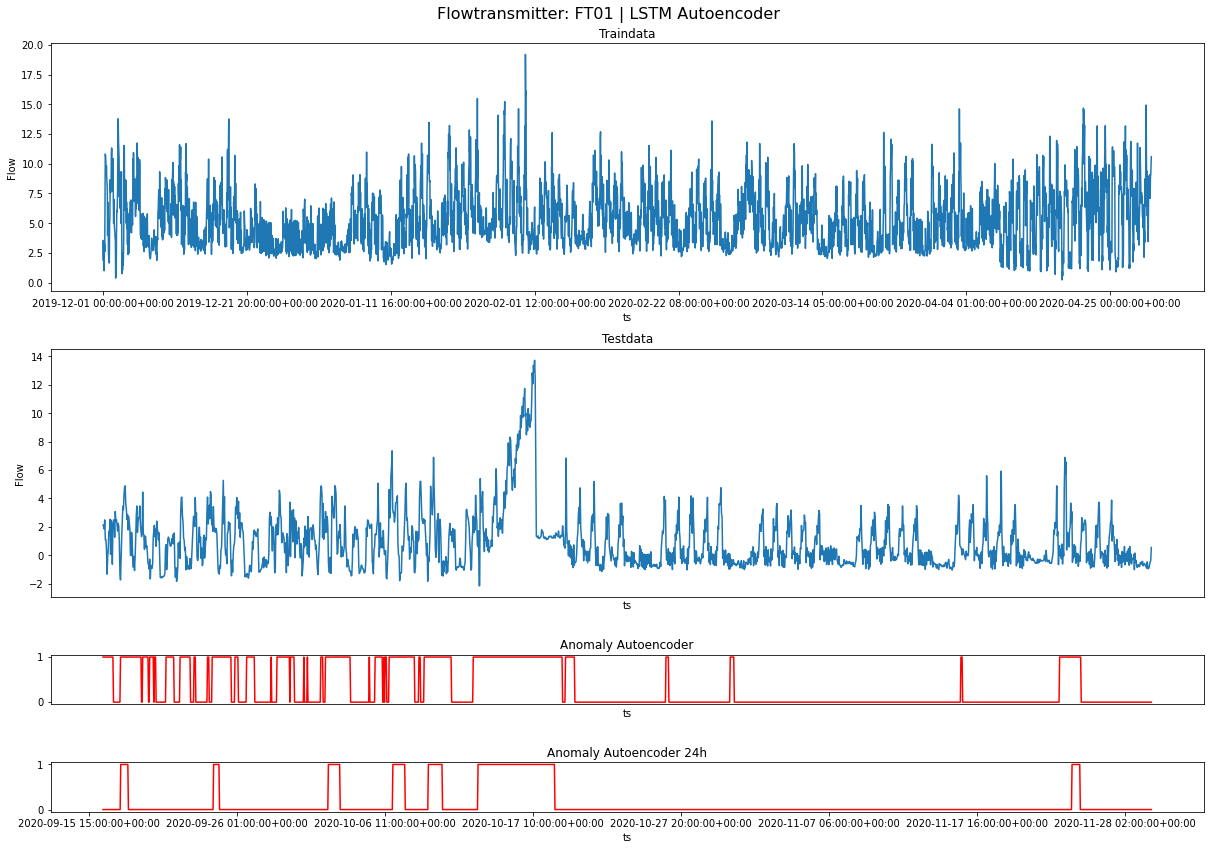

In [106]:
test_score_df["anomaly_rule"]=test_score_df["anomaly"].rolling(24).min()
fig, (a1,a2,a3,a4) = plt.subplots(nrows=4, ncols=1,gridspec_kw={'height_ratios': [5,5,1,1]})

df_train["_value"].plot(ax=a1,figsize=(17,12))
a1.set_title('Traindata')
a1.set_ylabel("Flow")

test_score_df["_value"].plot(ax=a2)
a2.set_title('Testdata')
a2.set_ylabel("Flow")
a2.get_xaxis().set_ticks([])

test_score_df["anomaly"].plot(color="red",ax=a3)
a3.set_title('Anomaly Autoencoder')
a3.get_xaxis().set_ticks([])

test_score_df["anomaly_rule"].plot(color="red",ax=a4)
a4.set_title('Anomaly Autoencoder 24h')
fig.suptitle('Flowtransmitter: '+ft_name+" | LSTM Autoencoder", fontsize=16)
fig.tight_layout()